# Euler Zeta Function

cid: 67eba795-9168-8009-806f-5d61c3dc6bf7

The Euler Zeta function is a special function of great significance in number theory and mathematical analysis.

$$
\zeta_e(s) = \prod_{p} \frac{e^{\sigma \log p}}{| e^{(\sigma+it) \log p} - 1 |}
$$

In [2]:
# matplotlib: setting Japanese font
# -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
# 日本語のフォント設定
plt.rcParams['font.family'] = 'kiloji'

この関数は $0 < Re(s) < 1$ の範囲で定義されます。

This function is defined in the range $0 < Re(s) < 1$.

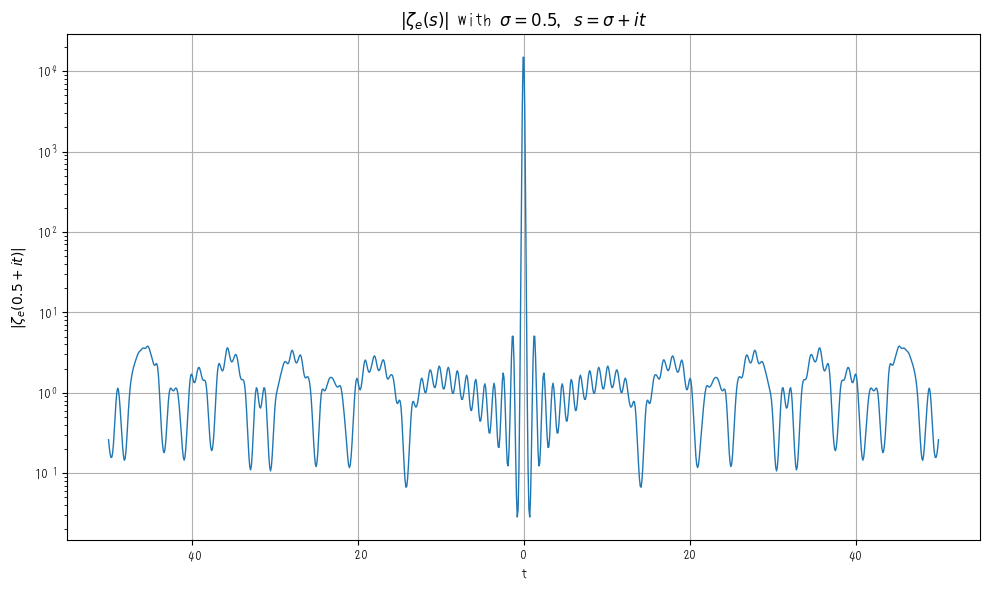

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import primerange

# 素数のリスト（最初の50個程度）
primes = list(primerange(2, 300))

# 計算パラメータ
sigma = 0.5
width = 50 # プロットの幅
line_width = 1 # 線の太さ
t_values = np.linspace(-width, width, 1000)

# 計算関数
def zeta_e(sigma, t, primes):
    product = 1.0
    for p in primes:
        numerator = p ** sigma
        denominator = abs(p ** (sigma + 1j * t) - 1)
        product *= numerator / denominator
    return product

# 絶対値を計算
zeta_e_values = np.array([zeta_e(sigma, t, primes) for t in t_values])

# プロット
plt.figure(figsize=(10, 6))
plt.plot(t_values, zeta_e_values, linewidth=line_width)
plt.title(r"$|\zeta_e(s)|$ with $\sigma=0.5$, $s=\sigma+it$")
plt.xlabel("t")
plt.ylabel(r"$|\zeta_e(0.5+it)|$")
plt.xscale('linear')
plt.yscale('log')
plt.grid(True)
plt.tight_layout()
plt.savefig("__zeta_e_plot-v0.png", dpi=300)
plt.show()


$Re(s) = 0.1 → 0.9$

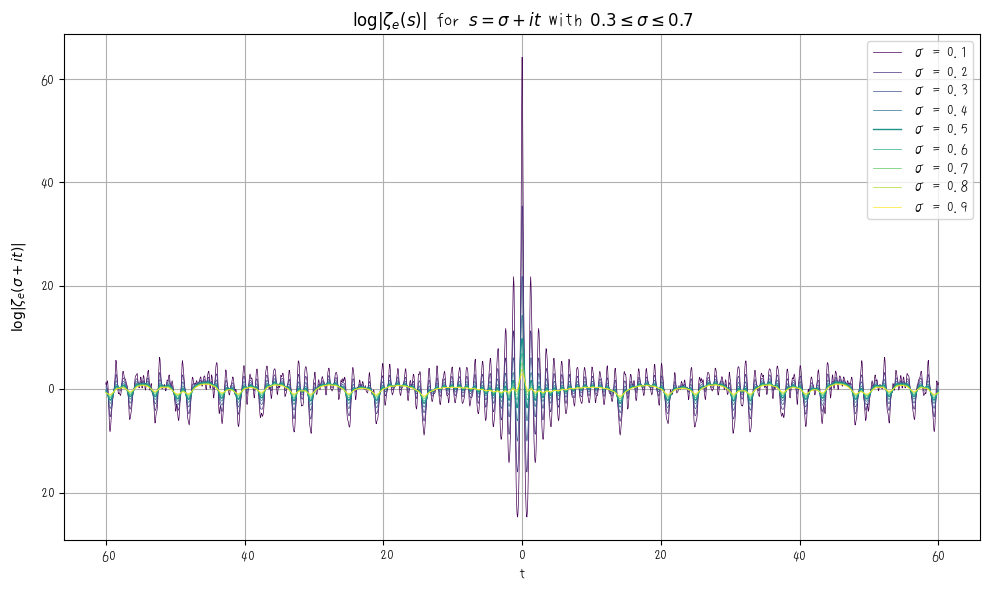

In [4]:
# 計算パラメータ
width = 60 # プロットの幅
sigma_values = np.arange(0.1, 1.0, 0.1)
t_values = np.linspace(-width, width, 2000)

# 色設定（グラデーション）
colors = plt.cm.viridis(np.linspace(0, 1, len(sigma_values)))
default_line_width = 0.5  # デフォルトの線の太さ
line_width_map = {0.5: 1.0}  # σ=0.5 の線の太さを特別に設定

# プロット
plt.figure(figsize=(10, 6))

for i, sigma in enumerate(sigma_values):
    zeta_e_vals = np.array([zeta_e(sigma, t, primes) for t in t_values])
    if np.any(zeta_e_vals <= 0):
        # 対数表示で log(0) を避けるために微小値を加算
        zeta_e_vals = np.maximum(zeta_e_vals, 1e-10)
    line_width = line_width_map.get(sigma, default_line_width)  # σ=0.5 の線の太さを特別に設定
    label = f"σ = {sigma:.1f}"
    plt.plot(t_values, np.log(zeta_e_vals), label=label, color=colors[i], linewidth=line_width)

plt.title(r"$\log|\zeta_e(s)|$ for $s=\sigma+it$ with $0.3 \leq \sigma \leq 0.7$")
plt.xlabel("t")
plt.ylabel(r"$\log|\zeta_e(\sigma+it)|$")
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("__zeta_e_plot-v1.png", dpi=300)
plt.show()


$Re(s) = 0.1 → 0.9$ with Overlapping non-trivial zero points.

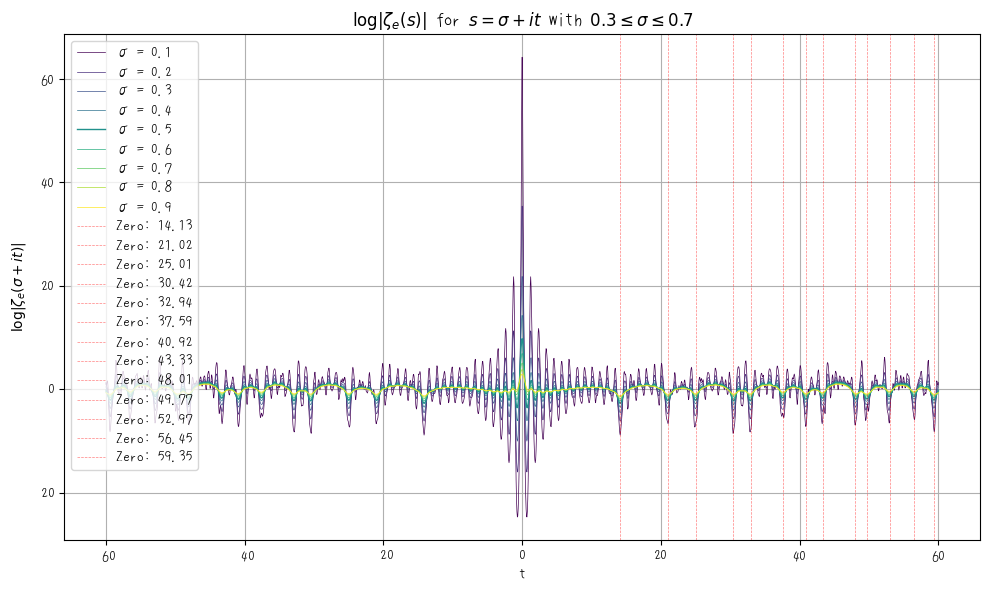

In [5]:
import mpmath as mp

# 非自明なゼロ点 13 個を取得 (59.35)
mp.dps = 50  # 精度設定
zeros = [mp.zetazero(n) for n in range(1, 13+1)]

# 計算パラメータ
width = 60 # プロットの幅
sigma_values = np.arange(0.1, 1.0, 0.1)
t_values = np.linspace(-width, width, 2000)

# 色設定（グラデーション）
colors = plt.cm.viridis(np.linspace(0, 1, len(sigma_values)))
default_line_width = 0.5  # デフォルトの線の太さ
line_width_map = {0.5: 1.0}  # σ=0.5 の線の太さを特別に設定

# プロット
plt.figure(figsize=(10, 6))

for i, sigma in enumerate(sigma_values):
    zeta_e_vals = np.array([zeta_e(sigma, t, primes) for t in t_values])
    if np.any(zeta_e_vals <= 0):
        # 対数表示で log(0) を避けるために微小値を加算
        zeta_e_vals = np.maximum(zeta_e_vals, 1e-10)
    line_width = line_width_map.get(sigma, default_line_width)  # σ=0.5 の線の太さを特別に設定
    label = f"σ = {sigma:.1f}"
    plt.plot(t_values, np.log(zeta_e_vals), label=label, color=colors[i], linewidth=line_width)

# ゼロ点をプロット
for zero in zeros:
    zero = float(zero.imag)
    plt.axvline(x=zero, color='red', linestyle='--', linewidth=0.5, label=f"Zero: {zero:.2f}", alpha=0.5)

plt.title(r"$\log|\zeta_e(s)|$ for $s=\sigma+it$ with $0.3 \leq \sigma \leq 0.7$")
plt.xlabel("t")
plt.ylabel(r"$\log|\zeta_e(\sigma+it)|$")
plt.xscale('linear')
plt.yscale('linear')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("__zeta_e_plot-v2.png", dpi=300)
plt.show()
